<a href="https://colab.research.google.com/github/Mongeese1/phyiscs-big-data/blob/master/week4LHCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.

Before we start - we have to use Python2 (not Python 3), so we should choose this as an option in "Runtime" -> "Change Runtime Type" at the top.

In [53]:
#we are going to make a directory called APPS
!mkdir - p APPS# Now we move to our directory called APPS and we download ROOT from the CERN server, this version is chosen because it runs on this machine -
#if you want to run this locally check the versions!
!cd APPS && wget https: //root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
#Now we extract our downloaded file:
!cd APPS && tar - xf root_v6 .13 .08.Linux - ubuntu18 - x86_64 - gcc7 .3.tar.gz


--2020-03-09 21:42:31--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.4’

root_v6.13.08.Linux 100%[===================>] 131.05M  97.1MB/s    in 1.3s    

2020-03-09 21:42:33 (97.1 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.4’ saved [137415272/137415272]



In [0]:
###Special thanks to BriefCud, xspronken, hollyqui and all the other members of our practical, without whom this code would not be possible###

In [55]:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

# ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

<CDLL '/content/APPS/root/lib/libFoam.so', handle 564daff46f00 at 7f82a8c4fc90>

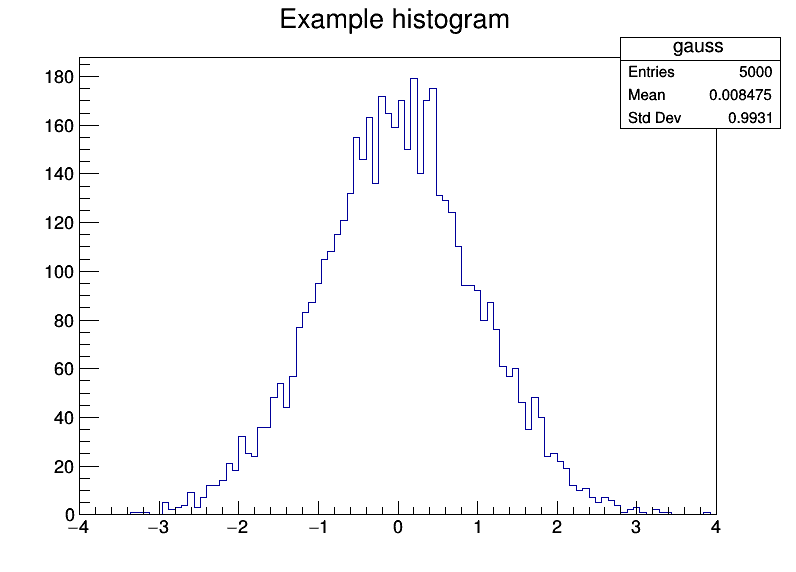

In [56]:
#Now we can check if we have everything working as we expect: 


ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathMore.so')
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)

#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data from CERN:

In [57]:
#Get CERN data
!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root



--2020-03-09 21:42:40--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.184.28.138, 188.185.82.144, 188.184.93.89, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.184.28.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root.4’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  57.1MB/s    in 9.6s    

2020-03-09 21:42:51 (44.2 MB/s) - ‘B2HHH_MagnetUp.root.4’ saved [444723234/444723234]



[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 3238126 out of range events


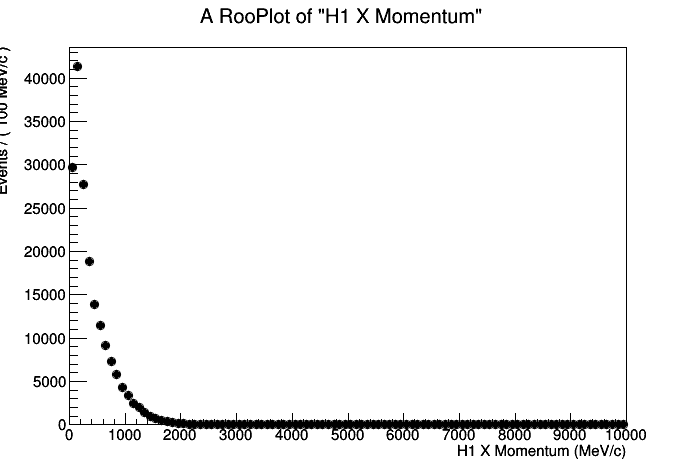

In [58]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",0,10000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",0,10000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",0,10000,"MeV/c")
# test = ROOT.RooRealVar('H1_PX','H1 X Momentum',0,10000,'MeV/c')
# ss = ROOT.RooDataSet('data','data set',tree,ROOT.RooArgSet(test),'1==1')
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. We have to use some detective work to extract the information we need on the original physics process at play.


Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We need to first combine this into a single measurement

In [59]:
#importing libgraf3d here cause python2 is a piece of shit
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')
#thought i might have needed np
import numpy as np
#function gets momentum of daughter particles on any track that is input
def p_daughter(daughter):
  p_tot = "(sqrt("+daughter+"_PX**2+"+daughter+"_PY**2+"+daughter+"_PZ**2))"

  return p_tot

p_daughter('H1')


'(sqrt(H1_PX**2+H1_PY**2+H1_PZ**2))'

Now plot the total momentum for one (or more) of the daughter particles.

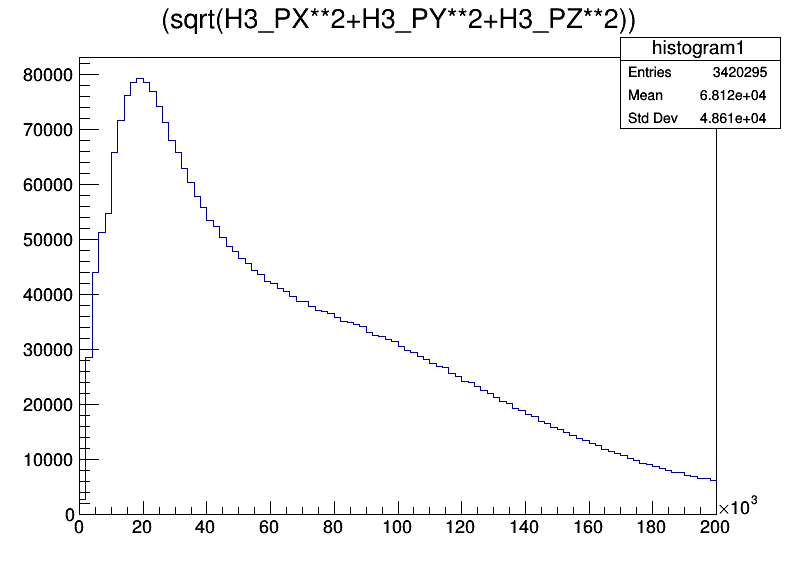

In [60]:
a = "H3"


f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")

params = ROOT.RooRealVar(p_daughter(a),"H3 P",0,10000,"MeV/c")
data = ROOT.RooDataSet("data", "data set",tree, ROOT.RooArgSet(params), "1==1")


c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw(p_daughter(a)+">>histogram1(100,0,200000)")
#tree.Draw("sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2))+>>histogram1,100")
histogram1 = ROOT.gDirectory.Get("histogram1")
#histogram1.Draw()
#Show me the canvas
c.Draw()
# mean = histogram1.G
# d(Mean)


The next step is to use the total momentum of the Kaon and its invarient mass (found with a small amount of research) and your relativity knowledge to get an equation for the energy of the Kaon. 

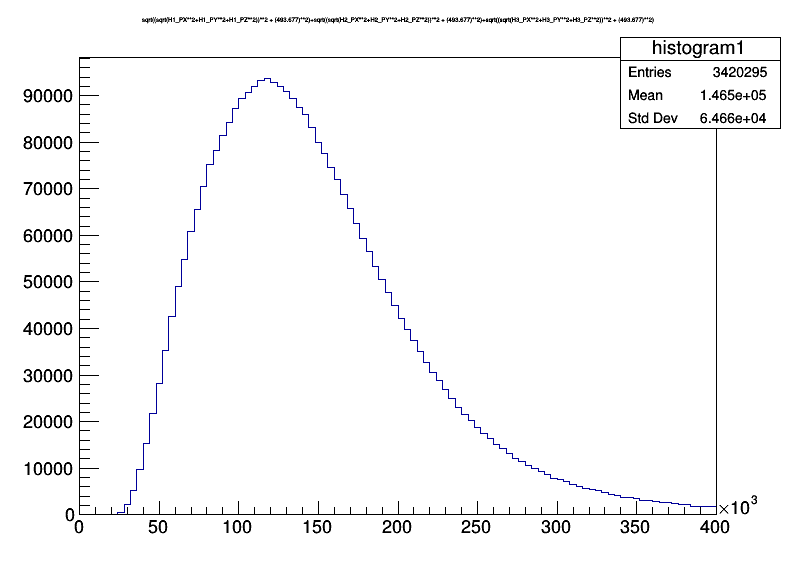

In [61]:
#Defining function to get Kaon energy from its mass in MeV, C^2 is not needed due to some physics magic i dont quite understand
params = ROOT.RooRealVar(p_daughter(a),"H3 P",0,10000,"MeV/c")
data = ROOT.RooDataSet("data", "data set",tree, ROOT.RooArgSet(params), "1==1")


MK = 493.677
def Energy(a,MK):
  return "sqrt("+p_daughter(a)+"**2 + ("+str(MK)+")**2)"
  
# for i in range(len(data)):
  # data.get(entr)
Energy('H1',MK)

c = ROOT.TCanvas("myCanvasName3","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw(Energy('H1',MK)+"+"+Energy('H2',MK)+"+" +Energy('H3',MK)+">>histogram1(100,0,400000)")
#tree.Draw("sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2))+>>histogram1,100")
histogram1 = ROOT.gDirectory.Get("histogram1")
#histogram1.Draw()
#Show me the canvas
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName3


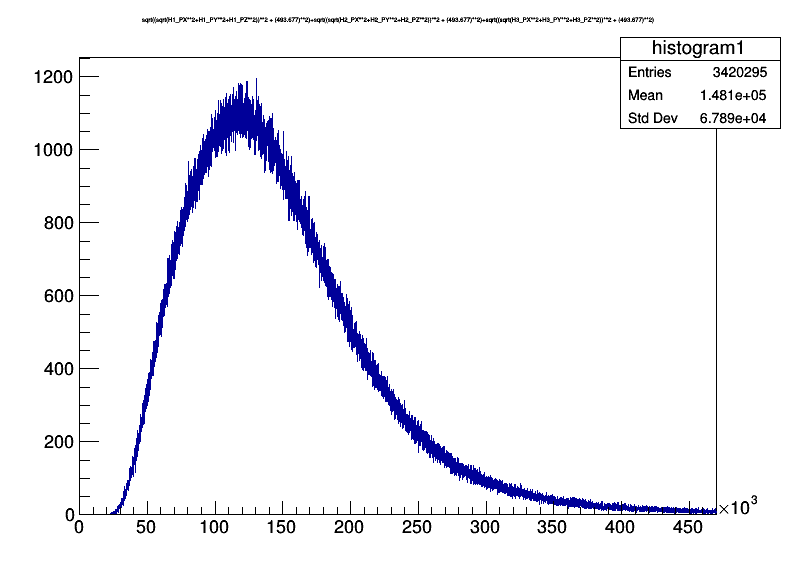

In [62]:
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
#redifining functions here just in case
def p_daughter(daughter):
  p_tot = "(sqrt("+daughter+"_PX**2+"+daughter+"_PY**2+"+daughter+"_PZ**2))"

  return p_tot

p_daughter('H1')

MK = 493.677
def Energy(a,MK):
  return "sqrt("+p_daughter(a)+"**2 + ("+str(MK)+")**2)"
  
# for i in range(len(data)):
  # data.get(entr)
Energy('H1',MK)

c = ROOT.TCanvas("myCanvasName3","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw(Energy('H1',MK)+"+"+Energy('H2',MK)+"+" +Energy('H3',MK)+">>histogram1(10000,0,470000)")
#tree.Draw("sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2))+>>histogram1,100")
histogram1 = ROOT.gDirectory.Get("histogram1")
#histogram1.Draw()
#Show me the canvas
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName3


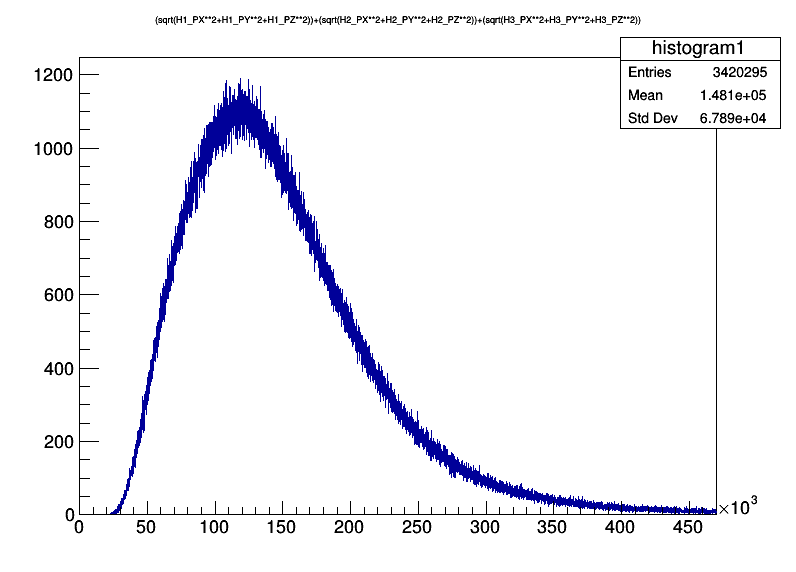

In [63]:
#momentum for B meson using momentum for kaons on each track

Bpx = "((H1_PX) + (H2_PX) + (H3_PX))**2"
Bpy = "((H1_PY) + (H2_PY) + (H3_PY))**2"
Bpz = "((H1_PZ) + (H2_PZ) + (H3_PZ))**2"

BPtot = "sqrt("+Bpx+" + "+Bpy+" + "+Bpz+")"



c = ROOT.TCanvas("myCanvasName3","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw(p_daughter('H1')+"+"+p_daughter('H2')+"+" +p_daughter('H3')+">>histogram1(10000,0,470000)")
#tree.Draw("sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2))+>>histogram1,100")
histogram1 = ROOT.gDirectory.Get("histogram1")
#histogram1.Draw()
#Show me the canvas
c.Draw()

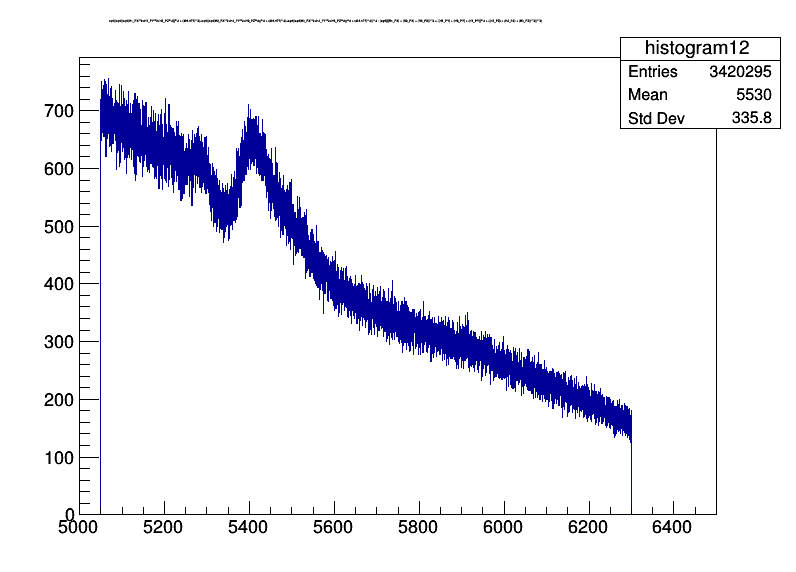

In [64]:
#defining total energy for B meson


etot = Energy('H1',MK)+"+"+Energy('H2',MK)+"+" +Energy('H3',MK)

#Mass of B Meson using its energy and momentum
def Mass():
  # MK = 493.677
  return "sqrt(("+etot+")**2 - ("+BPtot+")**2)"

c = ROOT.TCanvas("myCanvasName34","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw(Mass()+">>histogram12(10000,5000,6500")
#tree.Draw("sqrt((H1_PX**2)+(H1_PY**(H1_PZ**2))+>>histogram1,100")
histogram1 = ROOT.gDirectory.Get("histogram12")
#histogram1.Draw()
#Show me the canvas
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName34


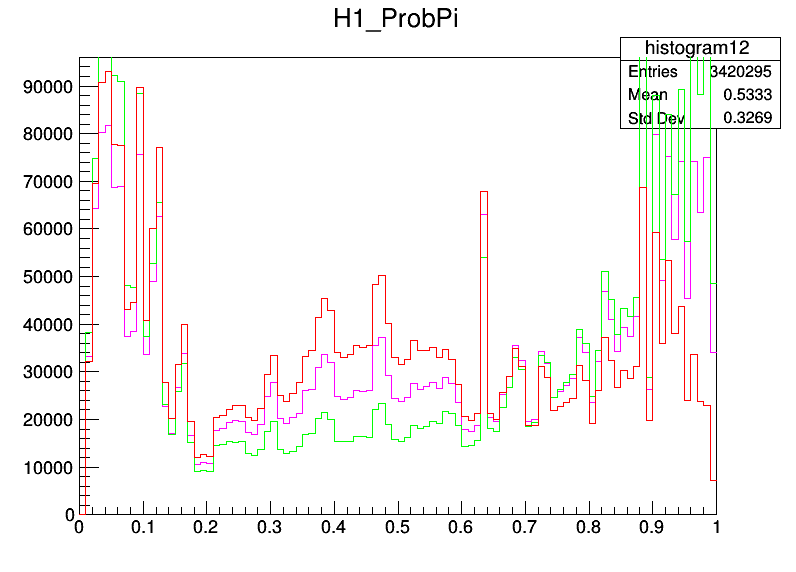

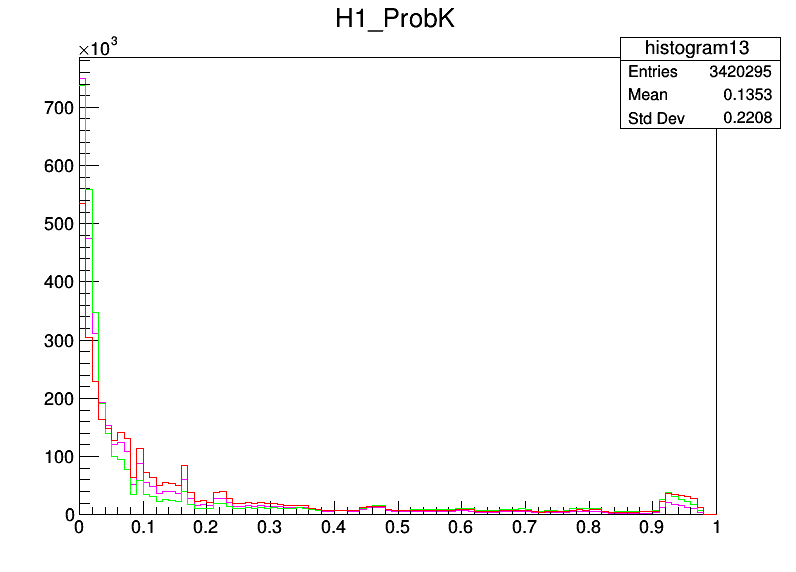

In [65]:
c = ROOT.TCanvas("myCanvasName34","The Canvas Title",800,600)
#Drawing out probabilites for each track to be a pion
tree.Draw('H1_ProbPi'+">>histogram12(100,0,1")
tree.Draw('H2_ProbPi'+">>histogram121(100,0,1")
tree.Draw('H3_ProbPi'+">>histogram1211(100,0,1")

#tree.Draw("sqrt((H1_PX**2)+(H1_PY**(H1_PZ**2))+>>histogram1,100")
histogram12 = ROOT.gDirectory.Get("histogram12")
histogram121 = ROOT.gDirectory.Get("histogram121")
histogram1211 = ROOT.gDirectory.Get("histogram1211")

histogram12.SetLineColor(6)
histogram12.Draw()

histogram121.SetLineColor(3)
histogram121.Draw('Same')

histogram1211.SetLineColor(2)
histogram1211.Draw('Same')


c.Draw()


# b = ROOT.TCanvas("myCanvasName34","The Canvas Title",800,600)
# #This string (below) is the total momentum of the H1 particle
# tree.Draw('H2_ProbPi'+">>histogram121(10000,0,1")
# #tree.Draw("sqrt((H1_PX**2)+(H1_PY**(H1_PZ**2))+>>histogram1,100")
# histogram1 = ROOT.gDirectory.Get("histogram121")
# b.Draw()

b = ROOT.TCanvas("myCanvasName345","The Canvas Title",800,600)
#Drawing out probabilities for each track to be a kaon
tree.Draw('H1_ProbK'+">>histogram13(100,0,1")
tree.Draw('H2_ProbK'+">>histogram131(100,0,1")
tree.Draw('H3_ProbK'+">>histogram1311(100,0,1")

#tree.Draw("sqrt((H1_PX**2)+(H1_PY**(H1_PZ**2))+>>histogram1,100")
histogram13 = ROOT.gDirectory.Get("histogram13")
histogram131 = ROOT.gDirectory.Get("histogram131")
histogram1311 = ROOT.gDirectory.Get("histogram1311")
#making different line colours to make sure everything is readable
histogram13.SetLineColor(6)
histogram13.Draw()

histogram131.SetLineColor(3)
histogram131.Draw('Same')

histogram1311.SetLineColor(2)
histogram1311.Draw('Same')


b.Draw()


H1_ProbK>0.4&H1_ProbPi<0.1&H2_ProbK>0.4&H2_ProbPi<0.1&H3_ProbK>0.4&H3_ProbPi<0.1&!H1_isMuon


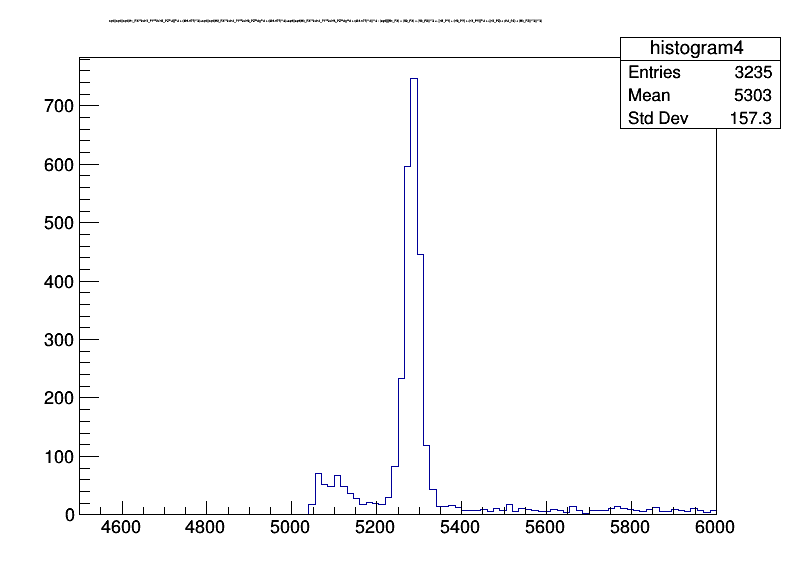

In [66]:
#Creating selection for our Cuttree, to remove unwanted entries, using probK>0.4 as there are quite a few entries that would be missed if using above 0.9
#In order to make sure that we're not getting a Pion take probability of it being a pion as less than 10%

selection=("H1_ProbK>0.4&H1_ProbPi<0.1&H2_ProbK>0.4&H2_ProbPi<0.1&H3_ProbK>0.4&H3_ProbPi<0.1&!H1_isMuon")
print(selection)

CutTree=tree.CopyTree(selection)


c = ROOT.TCanvas("myCanvasName123","The Canvas Title",800,600)
#Plot mass of B meson
CutTree.Draw(Mass() + ">>histogram4(100,4500,6000)")
#tree.Draw("sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2))+>>histogram1,100")
histogram4 = ROOT.gDirectory.Get("histogram4")
#histogram1.Draw()
#Show me the canvas
c.Draw()

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(B_Mass): fit range of variable sqrt((sqrt((sqrt(H1_PX**2+H1_PY**2+H1_PZ**2))**2 + (493.677)**2)+sqrt((sqrt(H2_PX**2+H2_PY**2+H2_PZ**2))**2 + (493.677)**2)+sqrt((sqrt(H3_PX**2+H3_PY**2+H3_PZ**2))**2 + (493.677)**2))**2 - (sqrt(((H1_PX) + (H2_PX) + (H3_PX))**2 + ((H1_PY) + (H2_PY) + (H3_PY))**2 + ((H1_PZ) + (H2_PZ) + (H3_PZ))**2))**2) expanded to nearest bin boundaries: [5000,5400] --> [4995,5400]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gaussian Signal,Exponential Background)
 **********
 **  190 **SET PRINT           1
 **********
 **********
 **  191 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Gauss_mean   5.20000e+03  5.00000e+01    5.10000e+03  5.80000e+03
     2 Gauss_width   1.00000e+01  5.00000e+00    0.00000e+00  6.00000e+01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


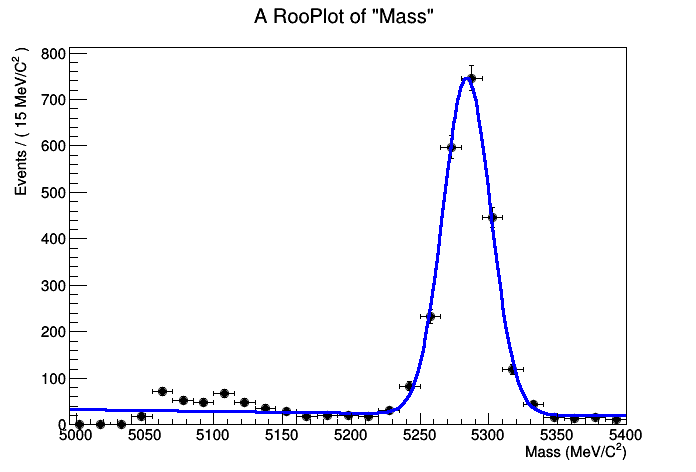

In [67]:

#Creating a RooRealVar to use for modelling
mass = ROOT.RooRealVar(str(Mass()),"Mass",5000,5400,"MeV/C^{2}")

#Creating a gaussian distribution 
#For the RooRealVar the last three parameters are given, "starting value" and min/max values
gaussMean = ROOT.RooRealVar("Gauss_mean","Mean",5200,5100,5800)
gaussWidth = ROOT.RooRealVar("Gauss_width","Width",10,0,60)

#Making the model
gauss = ROOT.RooGaussian("Gaussian Signal","Gauss",mass,gaussMean,gaussWidth)

#creating a background using an exponential
exponent = ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)

#Defining the model for the background
bkgnd = ROOT.RooExponential("Exponential Background","Bkgnd",mass,exponent)

#combinging the two functions into a single probability density function (PDF)
sigFrac = ROOT.RooRealVar("Signal Fraction","sigfrac", 0.1, 0, 1)
model = ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(gauss,bkgnd),ROOT.RooArgList(sigFrac))

hist = ROOT.RooDataHist("B_Mass", "Mass", ROOT.RooArgList(mass), histogram4, 1.0)

# dataToFit = ROOT.RooDataSet("Data Set","data_to_fit",CutTree, mass)

model.fitTo(hist)

#Now to plot it all
c1 = ROOT.TCanvas("c1","c1")
frame = mass.frame()
hist.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c1.Update()
c1.Draw()

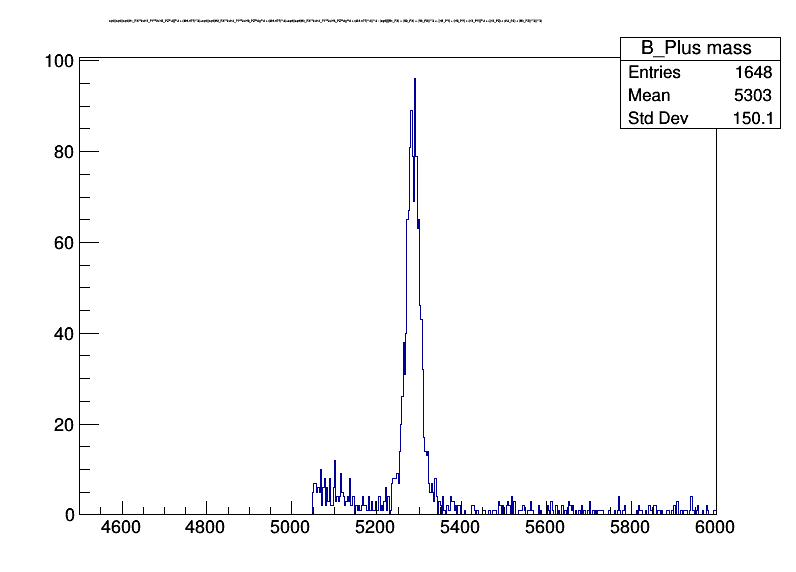

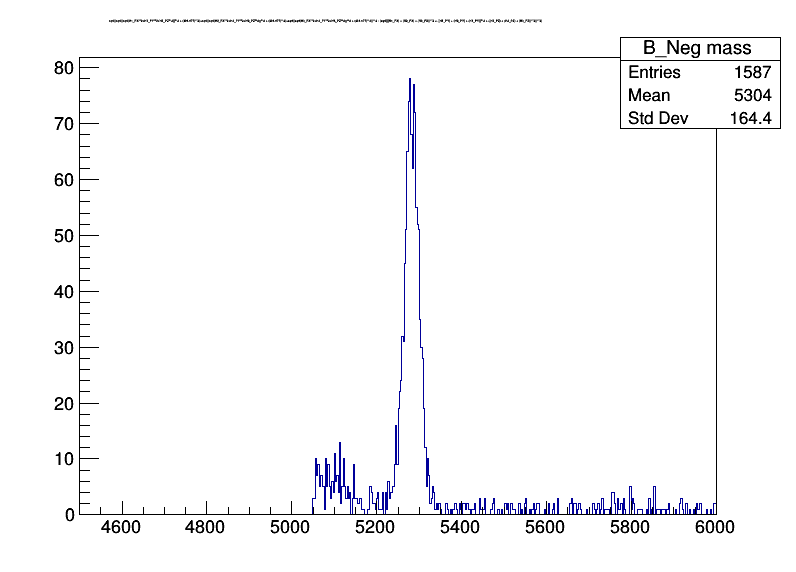

In [68]:
#Defining B+ and B-, since B+ is two K+ and 1 K- its charge will be 1, reverse is true for B-


B_plus = ("(H1_Charge+H2_Charge+H3_Charge)>0") 
B_neg = ("(H1_Charge+H2_Charge+H3_Charge)<0")

#Creating new trees for only B+ and B-
CutTreeB_p = CutTree.CopyTree(B_plus)
CutTreeB_n = CutTree.CopyTree(B_neg)

#Plotting B+ mass
c = ROOT.TCanvas("B_Plus mass", "B_Plus_mass",800,600)
CutTreeB_p.Draw(str(Mass()) + ">>B_Plus mass(500,4500,6000)")
B_plusmass = ROOT.gDirectory.Get("B_Plus mass")

c.Draw()
#Plotting B- mass
b = ROOT.TCanvas("B_Neg mass", "B_Neg_mass",800,600)
CutTreeB_n.Draw(str(Mass()) + ">>B_Neg mass(500,4500,6000)")
B_negmass = ROOT.gDirectory.Get("B_Neg mass")
b.Draw()

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(B_Neg_mass): fit range of variable sqrt((sqrt((sqrt(H1_PX**2+H1_PY**2+H1_PZ**2))**2 + (493.677)**2)+sqrt((sqrt(H2_PX**2+H2_PY**2+H2_PZ**2))**2 + (493.677)**2)+sqrt((sqrt(H3_PX**2+H3_PY**2+H3_PZ**2))**2 + (493.677)**2))**2 - (sqrt(((H1_PX) + (H2_PX) + (H3_PX))**2 + ((H1_PY) + (H2_PY) + (H3_PY))**2 + ((H1_PZ) + (H2_PZ) + (H3_PZ))**2))**2) expanded to nearest bin boundaries: [4995,5400] --> [4995,5400]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gaussian Signal,Exponential Background)
 **********
 **  199 **SET PRINT           1
 **********
 **********
 **  200 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Gauss_mean   5.28396e+03  4.19062e-01    5.10000e+03  5.80000e+03
     2 Gauss_width   1.74173e+01  3.55921e-01    0.00000e+00  6.00000e

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


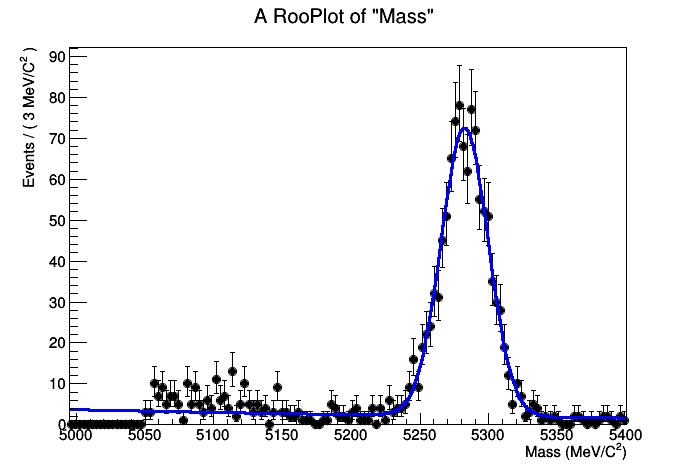

In [69]:
#Modelling Meson mass using similar method to above, however this time split up into B+ and B-, since their masses should be the same the old rooarglist should be acceptable

B_Negfit = ROOT.RooDataHist("B_Neg_mass", "Mass", ROOT.RooArgList(mass),B_negmass,1.0)
model.fitTo(B_Negfit)
c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
B_Negfit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(1),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(2),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c1.Update()
c1.Draw()

ValVNeg = gauss.getValV()
EntriesBNeg = CutTreeB_n.GetEntries()
BinBNeg = B_Negfit.numEntries()





[#1] INFO:DataHandling -- RooDataHist::adjustBinning(B_Plus_mass): fit range of variable sqrt((sqrt((sqrt(H1_PX**2+H1_PY**2+H1_PZ**2))**2 + (493.677)**2)+sqrt((sqrt(H2_PX**2+H2_PY**2+H2_PZ**2))**2 + (493.677)**2)+sqrt((sqrt(H3_PX**2+H3_PY**2+H3_PZ**2))**2 + (493.677)**2))**2 - (sqrt(((H1_PX) + (H2_PX) + (H3_PX))**2 + ((H1_PY) + (H2_PY) + (H3_PY))**2 + ((H1_PZ) + (H2_PZ) + (H3_PZ))**2))**2) expanded to nearest bin boundaries: [4995,5400] --> [4995,5400]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gaussian Signal,Exponential Background)
 **********
 **  208 **SET PRINT           1
 **********
 **********
 **  209 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Gauss_mean   5.28239e+03  5.93958e-01    5.10000e+03  5.80000e+03
     2 Gauss_width   1.72050e+01  4.97580e-01    0.00000e+00  6.00000

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


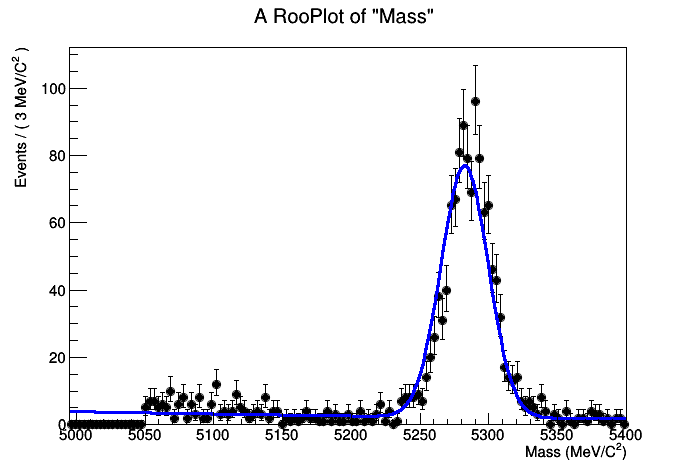

In [70]:
B_plusfit = ROOT.RooDataHist("B_Plus_mass", "Mass", ROOT.RooArgList(mass),B_plusmass,1.0)
model.fitTo(B_Negfit)
c2=ROOT.TCanvas("c2","c2")
frame=mass.frame()
B_plusfit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(1),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(2),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c2.Update()
c2.Draw()

ValVPlus = gauss.getValV()
EntriesBPlus = CutTreeB_p.GetEntries()
BinBPlus = B_plusfit.numEntries()



In [71]:
#Area under both models

ABP = (ValVPlus * EntriesBPlus)/BinBPlus
ABN  = (ValVNeg * EntriesBNeg)/BinBNeg
print(ABP)
print(ABN)

print(ABP - ABN)
print("Slightly more matter is created than anitmatter, atleast it would seem so, however this is a very small value, and my calculations and statistical analysis here are not as good as can be, therefore within margin of error this may very well be 0. This may however provide an explanation as to why more matter is created than antimatter")

###FUN FACT: I talked about baryonic asymmetry in my UM interview when asked what expirement I would do with infinite money###

0.000128021816333
0.000123281965516
4.73985081651e-06
Slightly more matter is created than anitmatter, atleast it would seem so, however this is a very small value, and my calculations and statistical analysis here are not as good as can be, therefore within margin of error this may very well be 0. This may however provide an explanation as to why more matter is created than antimatter


We have now completed the initial steps and begun to work through what we need to with the data. This workflow is divided into 4 stages, just for easier viewing and comprehension.